# Hisse Senedi Piyasası Analizi
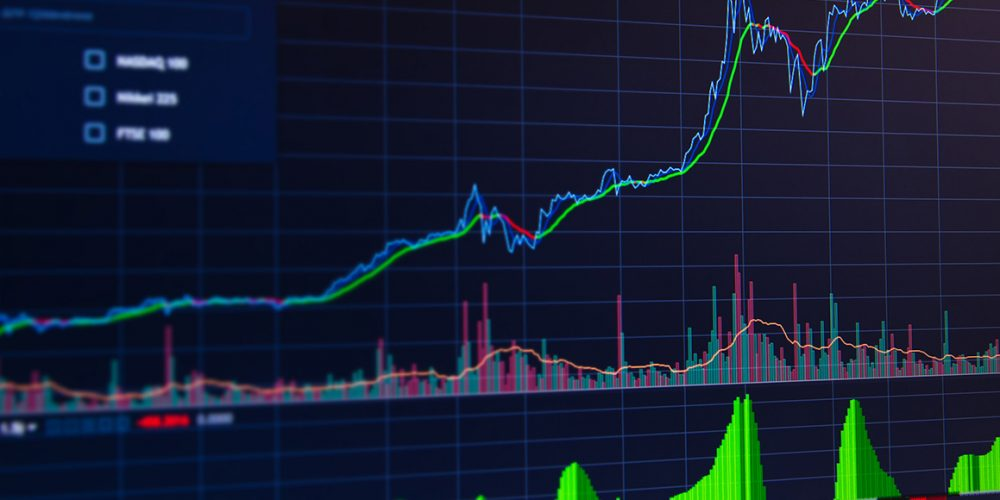

Zaman Serisi verileri, zaman sırasına göre indekslenen bir dizi veri noktasıdır. Zaman serisi verileri her yerdedir, bu nedenle bunların manipüle edilmesi her veri analisti veya veri bilimci için önemlidir.

Bu not defterinde borsadan, özellikle de bazı teknoloji hisse senetlerinden (Apple, Amazon, Google ve Microsoft) elde edilen verileri keşfedip inceleyeceğiz. Hisse senedi bilgilerini almak için yfinance'ı nasıl kullanacağımızı öğreneceğiz ve Seaborn ve Matplotlib'i kullanarak bunun farklı yönlerini görselleştireceğiz. Bir hisse senedinin önceki performans geçmişine dayanarak riskini analiz etmenin birkaç yoluna bakacağız. Ayrıca Uzun Kısa Süreli Bellek (LSTM) yöntemiyle gelecekteki hisse senedi fiyatlarını da tahmin edeceğiz!

Yol boyunca aşağıdaki soruları cevaplayacağız:

    1.) Hisse senedi fiyatının zaman içinde değişimi ne oldu?
    2.) Hisse senedinin günlük getirisi ortalama ne kadardı?
    3.) Çeşitli hisse senetlerinin hareketli ortalaması neydi?
    4.) Farklı hisse senetleri arasındaki korelasyon neydi?
    5.) Belirli bir hisse senedine yatırım yaparak ne kadar değeri riske atıyoruz?
    6.) Gelecekteki hisse senedi davranışını nasıl tahmin etmeye çalışabiliriz? (APPLE Inc.'in kapanış fiyatı hisse senedi fiyatının LSTM kullanılarak tahmin edilmesi)

***

## Veriyi Alma
İlk adım veriyi alıp belleğe yüklemektir. Hisse senedi verilerimizi Yahoo Finance web sitesinden alacağız. Yahoo Finance, cazip yatırımlar bulmak için finansal piyasa verileri ve araçları içeren zengin bir kaynaktır. Verileri Yahoo Finance'den almak için, Yahoo'dan piyasa verilerini indirmenin iş parçacıklı ve Pythonic bir yolunu sunan yfinance kitaplığını kullanacağız. Yfinance hakkında daha fazla bilgi edinmek için bu makaleye göz atın: [Python ile geçmiş piyasa verilerini güvenilir bir şekilde indirin](https://aroussi.com/post/python-yahoo-finance)

# 1. Hisse senedinin fazla mesai fiyatındaki değişiklik ne oldu?

Bu bölümde pandalarla hisse senedi bilgisi istemenin nasıl ele alınacağını ve bir hisse senedinin temel özelliklerinin nasıl analiz edileceğini ele alacağız.

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

# Bu analiz için kullanacağımız teknoloji hisseleri
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Veri yakalama için Bitiş ve Başlangıç ​​zamanlarını ayarlayın
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-13,142.080002,143.229996,140.669998,142.589996,142.589996,35680600,AMAZON
2023-11-14,145.000000,147.259995,144.679993,145.800003,145.800003,56674600,AMAZON
2023-11-15,147.059998,147.289993,142.589996,143.199997,143.199997,63875700,AMAZON
2023-11-16,140.910004,143.320007,139.520004,142.830002,142.830002,49653500,AMAZON
2023-11-17,142.660004,145.229996,142.539993,145.179993,145.179993,49636700,AMAZON
2023-11-20,145.130005,146.630005,144.729996,146.130005,146.130005,41951200,AMAZON
2023-11-21,143.910004,144.050003,141.500000,143.899994,143.899994,71226000,AMAZON
2023-11-22,144.570007,147.740005,144.570007,146.710007,146.710007,45669100,AMAZON
2023-11-24,146.699997,147.199997,145.320007,146.740005,146.740005,22378400,AMAZON


Verilerimizin içeriğini incelediğimizde verilerin sayısal olduğunu, tarihin ise verinin indeksi olduğunu görebiliriz. Ayrıca kayıtlarda hafta sonlarının eksik olduğuna dikkat edin.

**Kısa not:** "globals()" kullanmak, "DataFrame" adlarını ayarlamanın özensiz bir yoludur, ancak basittir. Artık verilerimiz elimizde, bazı temel veri analizleri yapıp verilerimizi kontrol edelim.

## Verilere İlişkin Tanımlayıcı İstatistikler
`.describe()` tanımlayıcı istatistikler üretir. Tanımlayıcı istatistikler, 'NaN' değerleri hariç, bir veri kümesinin dağılımının merkezi eğilimini, dağılımını ve şeklini özetleyenleri içerir.

Hem sayısal hem de nesne serilerinin yanı sıra karışık veri türlerinden oluşan "DataFrame" sütun kümelerini analiz eder. Çıktı, sağlanan şeye bağlı olarak değişecektir. Daha fazla ayrıntı için aşağıdaki notlara bakın.

In [3]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,167.146335,168.798287,165.765857,167.371275,166.871373,6.195748e+07
std,18.588613,18.403162,18.756784,18.569030,18.722854,1.875632e+07
min,126.010002,127.769997,124.169998,125.019997,124.325089,2.404830e+07
25%,151.699997,153.620003,150.529999,152.235001,151.504623,4.951520e+07
50%,172.300003,173.850006,171.000000,172.690002,172.230225,5.745070e+07
75%,180.379997,181.854996,178.235001,180.380005,180.021080,6.912690e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.601569e+08


Hafta sonları verilere dahil edilmediğinden bir yılda sadece 255 kaydımız var.

## Verilere İlişkin Bilgiler
`.info()` yöntemi, 'dtype' dizini ve sütunlar, boş olmayan değerler ve bellek kullanımı dahil olmak üzere bir DataFrame hakkındaki bilgileri yazdırır.

In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-28 to 2023-11-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Kapanış fiyatı

Kapanış fiyatı, hisse senedinin normal işlem gününde işlem gördüğü son fiyattır. Bir hisse senedinin kapanış fiyatı, yatırımcıların zaman içindeki performansını takip etmek için kullandıkları standart ölçüttür.

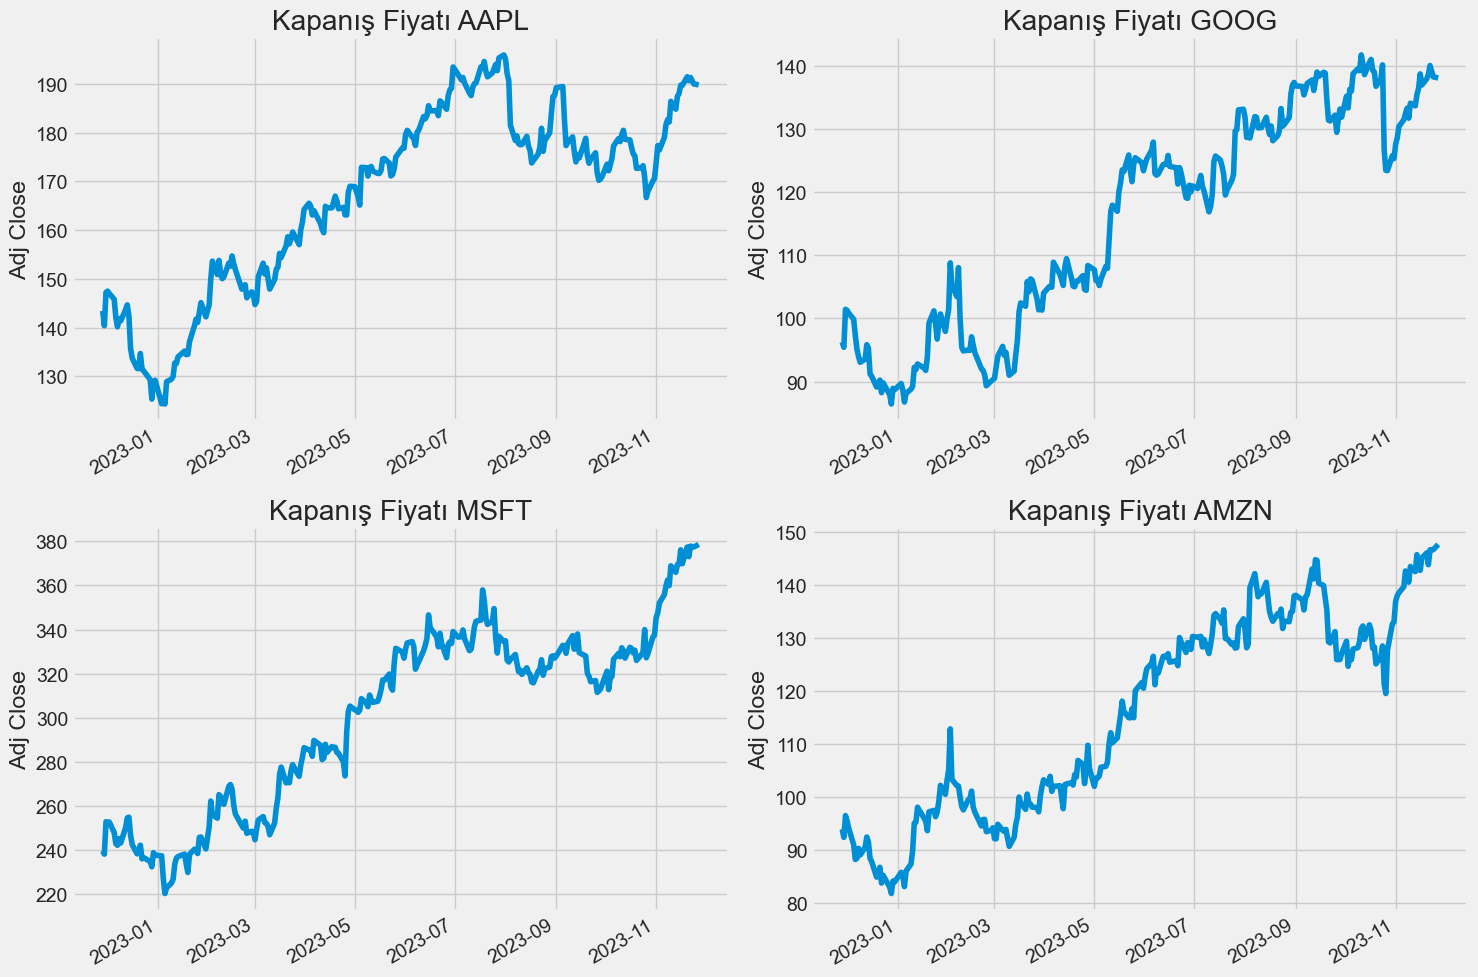

In [5]:
# Kapanış fiyatının tarihsel görünümünü görelim
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Kapanış Fiyatı {tech_list[i - 1]}")
    
plt.tight_layout()

## Satış Hacmi
Hacim, bir varlığın veya menkul kıymetin belirli bir süre boyunca, çoğunlukla da bir gün içinde el değiştiren miktarıdır. Örneğin hisse senedi işlem hacmi, günlük açılış ve kapanış arasında işlem gören menkul kıymet hisselerinin sayısını ifade eder. İşlem hacmi ve zaman içinde hacimde meydana gelen değişiklikler teknik yatırımcılar için önemli girdilerdir.

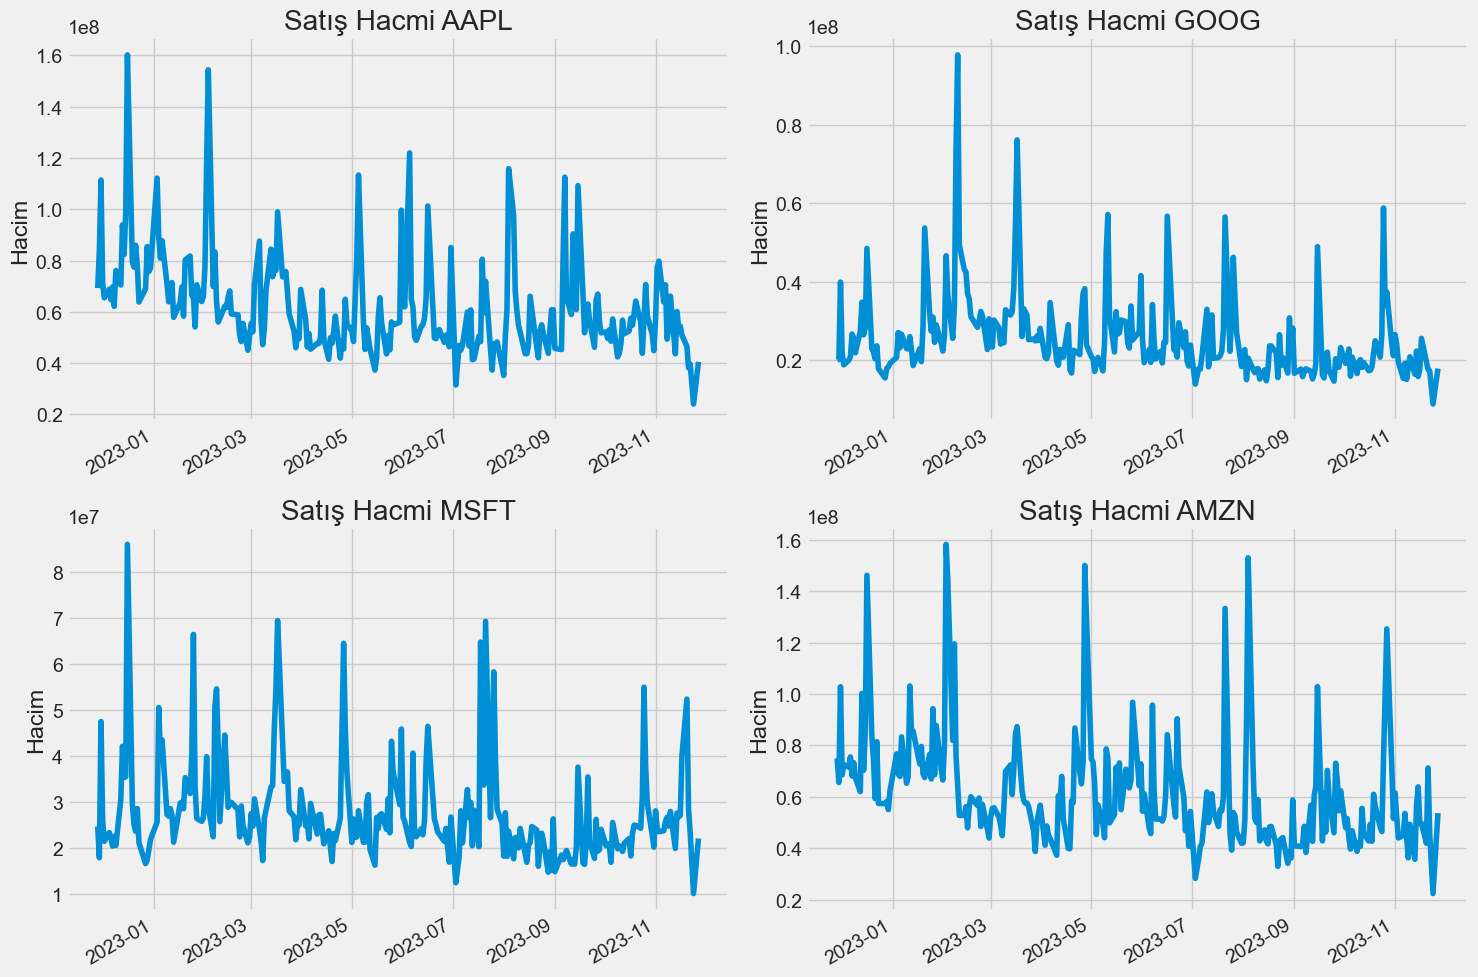

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Hacim')
    plt.xlabel(None)
    plt.title(f"Satış Hacmi {tech_list[i - 1]}")
    
plt.tight_layout()

Artık kapanış fiyatına ve her gün işlem gören hacme ilişkin görselleştirmeleri gördüğümüze göre, devam edip hisse senedinin hareketli ortalamasını hesaplayalım.

# 2. Çeşitli hisse senetlerinin hareketli ortalaması neydi?

Hareketli ortalama (MA), sürekli güncellenen bir ortalama fiyat oluşturarak fiyat verilerini düzelten basit bir teknik analiz aracıdır. Ortalama, 10 gün, 20 dakika, 30 hafta veya yatırımcının seçtiği herhangi bir zaman dilimi gibi belirli bir süre boyunca alınır.

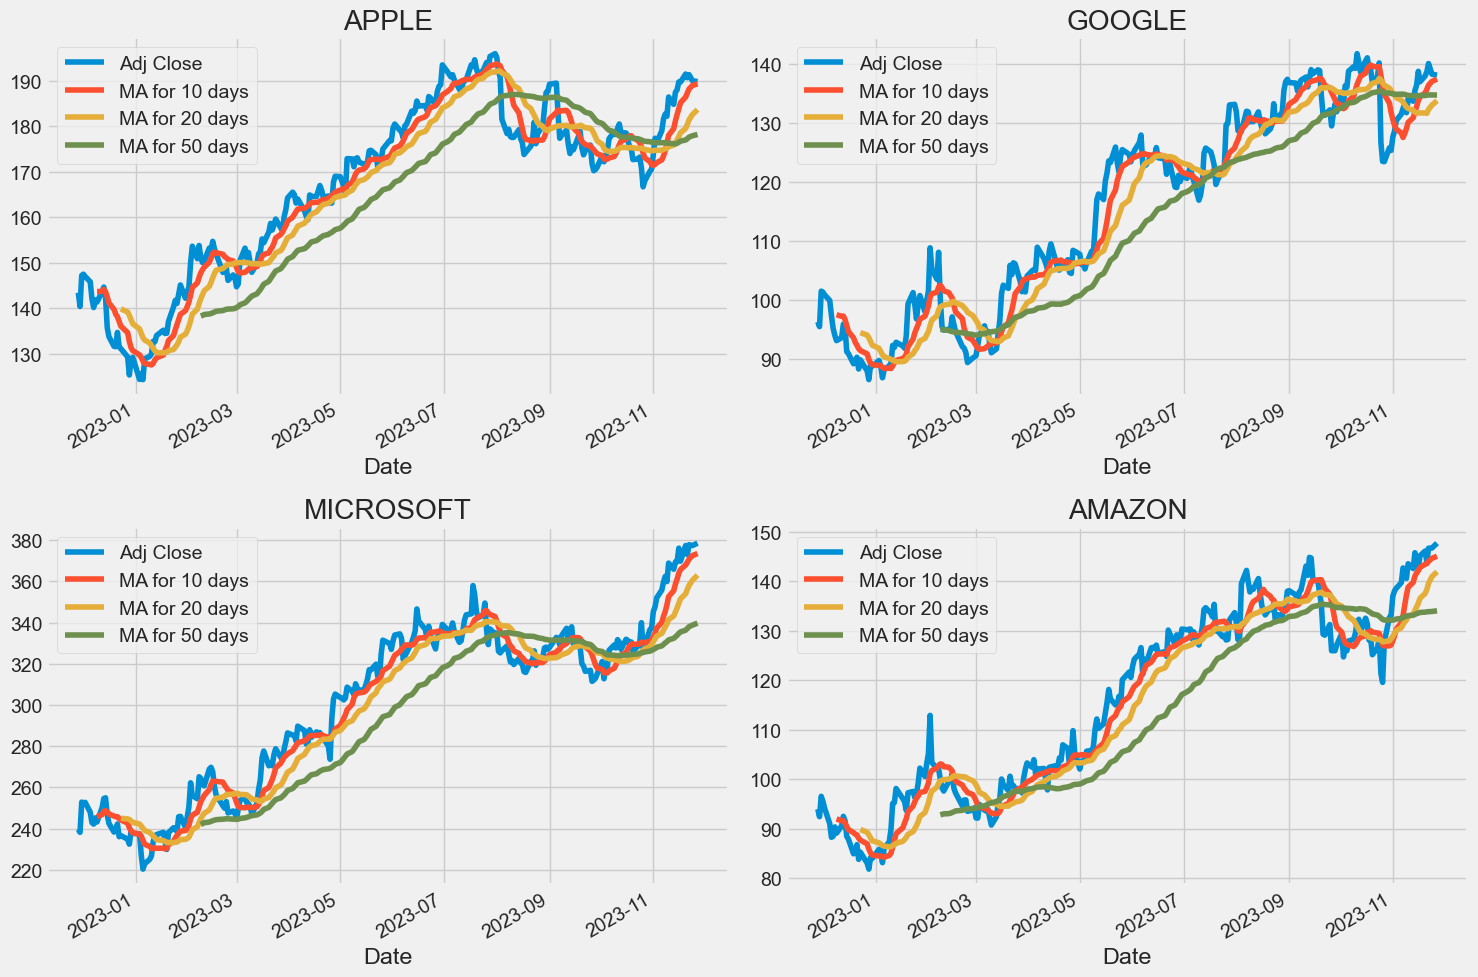

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Grafikte hareketli ortalamayı ölçmek için en iyi değerlerin 10 ve 20 gün olduğunu görüyoruz çünkü verilerdeki eğilimleri gürültüsüz olarak hala yakalıyoruz.

# 3. Hisse senedinin ortalama günlük getirisi ne kadardı?

Artık bazı temel analizler yaptığımıza göre, devam edip biraz daha derine inelim. Şimdi hisse senedinin riskini analiz edeceğiz. Bunu yapabilmek için hisse senedinin yalnızca mutlak değerine değil, günlük değişimlerine de daha yakından bakmamız gerekecek. Devam edelim ve Apple hisselerinin günlük getirilerini almak için pandaları kullanalım.

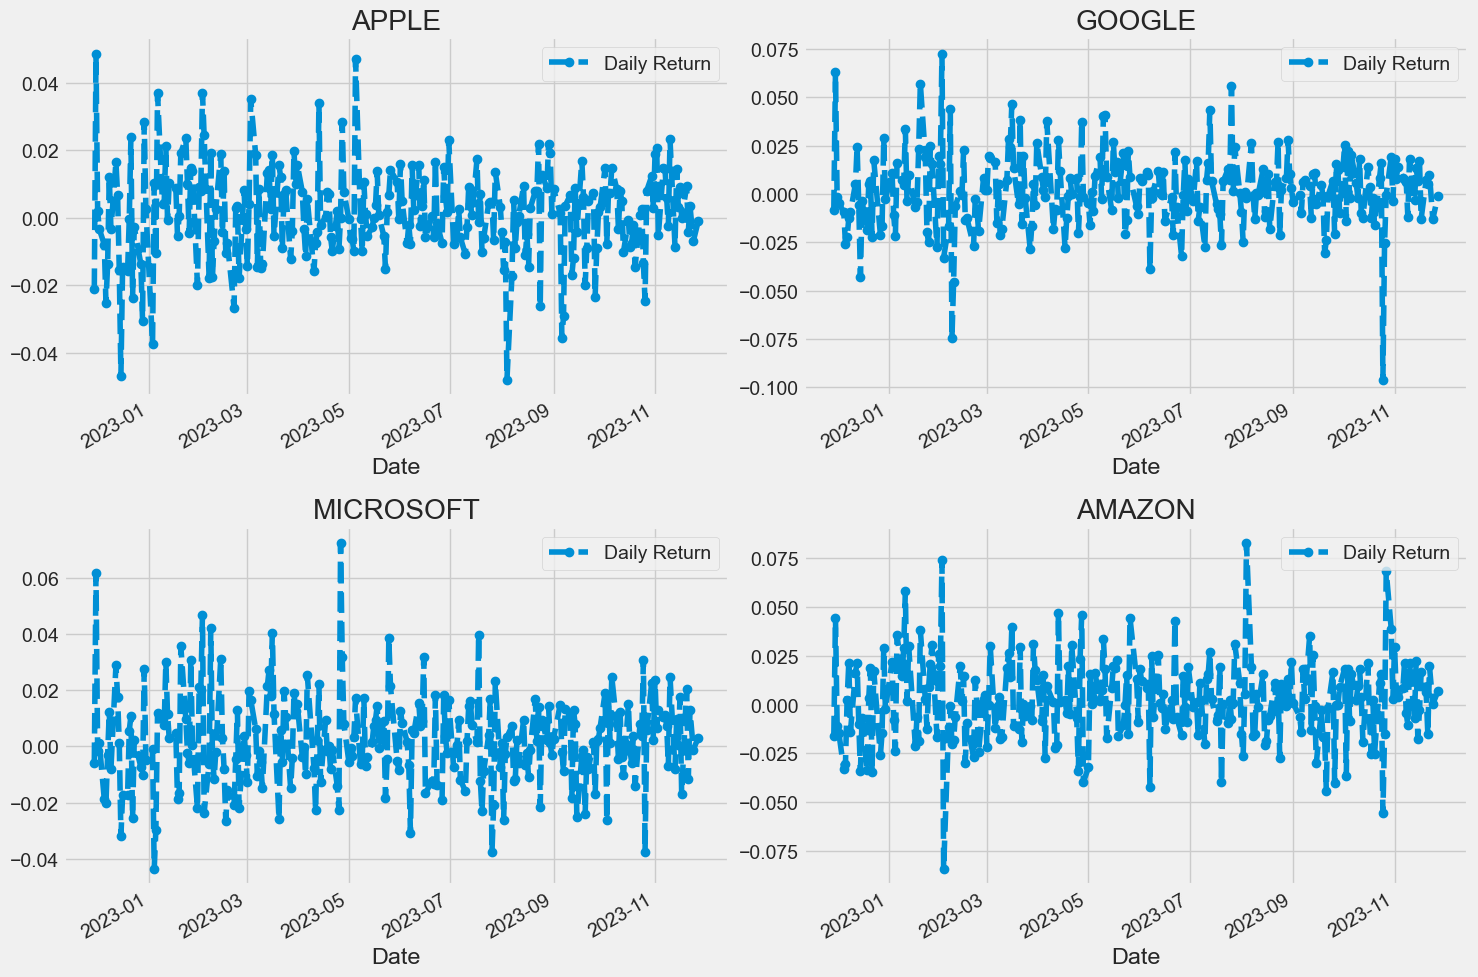

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Harika, şimdi histogram kullanarak ortalama günlük getiriye genel bir göz atalım. Aynı şekil üzerinde hem histogram hem de kde grafiği oluşturmak için seaborn'u kullanacağız.

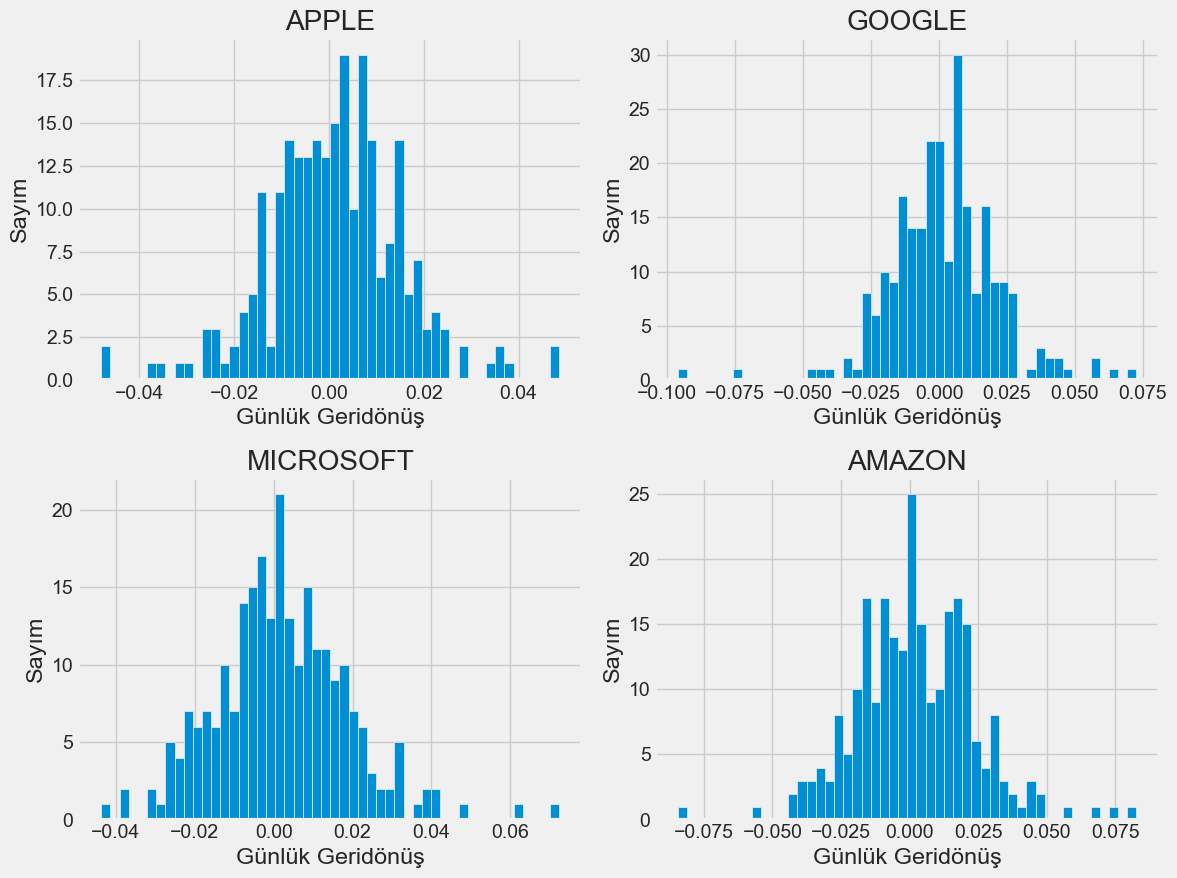

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Günlük Geridönüş')
    plt.ylabel('Sayım')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. Farklı hisse senedi kapanış fiyatları arasındaki korelasyon neydi?

Korelasyon, -1,0 ile +1,0 arasında olması gereken bir değere sahip, iki değişkenin birbirine göre hareket etme derecesini ölçen bir istatistiktir. Korelasyon ilişkilendirmeyi ölçer, ancak x'in y'ye mi neden olduğunu veya tam tersini mi yoksa ilişkinin üçüncü bir faktörden mi kaynaklandığını göstermez[1].

Peki listemizdeki tüm hisse senetlerinin getirilerini analiz etmek istesek ne olur? Devam edelim ve her bir hisse senedi veri çerçevesi için tüm ['Kapat'] sütunlarını içeren bir DataFrame oluşturalım.

In [10]:
# Teknoloji hisse senedi listesinin tüm kapanış fiyatlarını tek bir DataFrame'e alın
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# DataFrame'i döndüren yeni bir teknoloji yapın
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-28,NaN,NaN,NaN,NaN
2022-11-29,-0.021148,-0.016285,-0.008416,-0.005915
2022-11-30,0.048594,0.044579,0.062971,0.061624
2022-12-01,0.001891,-0.010773,-0.001676,-0.001764
2022-12-02,-0.003371,-0.014346,-0.004443,0.001296


Artık iki hisse senedinin günlük getiri yüzdesini karşılaştırarak korelasyonun ne kadar olduğunu kontrol edebiliriz. Öncelikle bir çorabın kendisiyle karşılaştırmasını görelim.

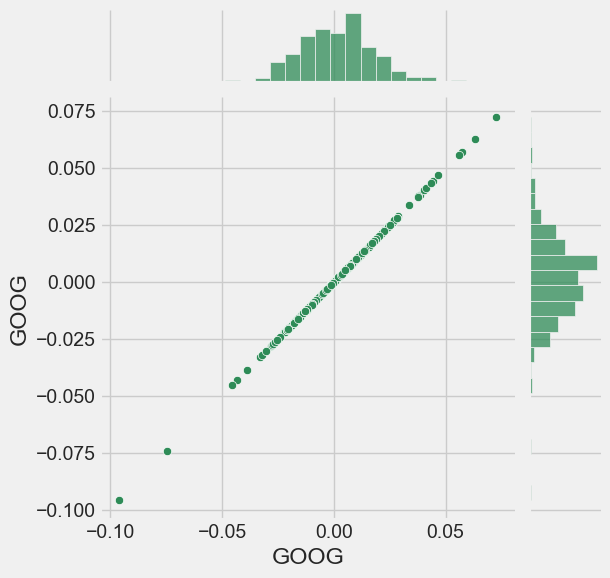

In [11]:
# Google'ı kendisiyle karşılaştırmak mükemmel bir doğrusal ilişki göstermelidir
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

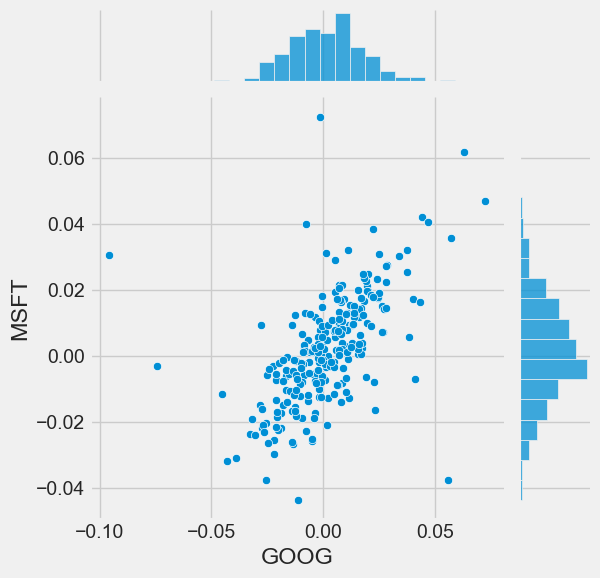

In [12]:
# Google ve Microsoft'un günlük getirilerini karşılaştırmak için joinplot'u kullanacağız
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

Böylece, eğer iki hisse senedi birbirleriyle mükemmel (ve pozitif) korelasyona sahipse, günlük getiri değerleri arasında doğrusal bir ilişkinin oluşması gerektiğini görebiliriz.

Seaborn ve pandalar, teknoloji hisse senedi listemizdeki olası her hisse senedi kombinasyonu için bu karşılaştırma analizini tekrarlamayı çok kolaylaştırıyor. Bu grafiği otomatik olarak oluşturmak için sns.pairplot() işlevini kullanabiliriz.

c:\Users\Serkan POLAT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


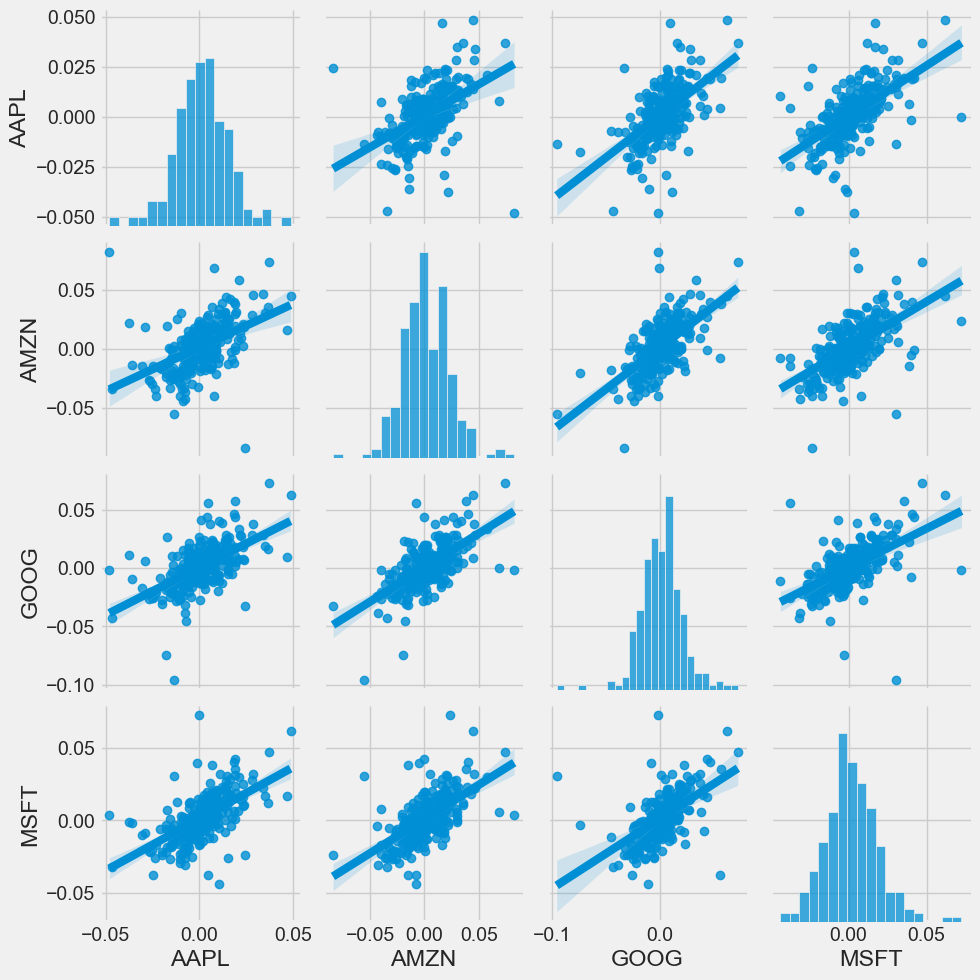

In [13]:
# Otomatik görsel analiz için DataFrame'imizde basitçe çift grafiği çağırabiliriz tüm karşılaştırmaların sayısı

sns.pairplot(tech_rets, kind='reg')

Yukarıda tüm hisse senetleri arasındaki günlük getiri ilişkilerini görebiliyoruz. Hızlı bir bakış, Google ile Amazon'un günlük getirileri arasında ilginç bir korelasyon olduğunu gösteriyor. Bireysel hapishaneyi araştırmak ilginç olabilir.

Sadece `sns.pairplot()'u çağırmanın basitliği harika olsa da, köşegende, üstteki üçgende ve alttaki üçgende ne tür grafiklerin yer aldığı da dahil olmak üzere şeklin tam kontrolü için `sns.PairGrid()'ı da kullanabiliriz. üçgen. Aşağıda bu sonuca ulaşmak için denizde doğuşun tüm gücünden yararlanmanın bir örneği bulunmaktadır.

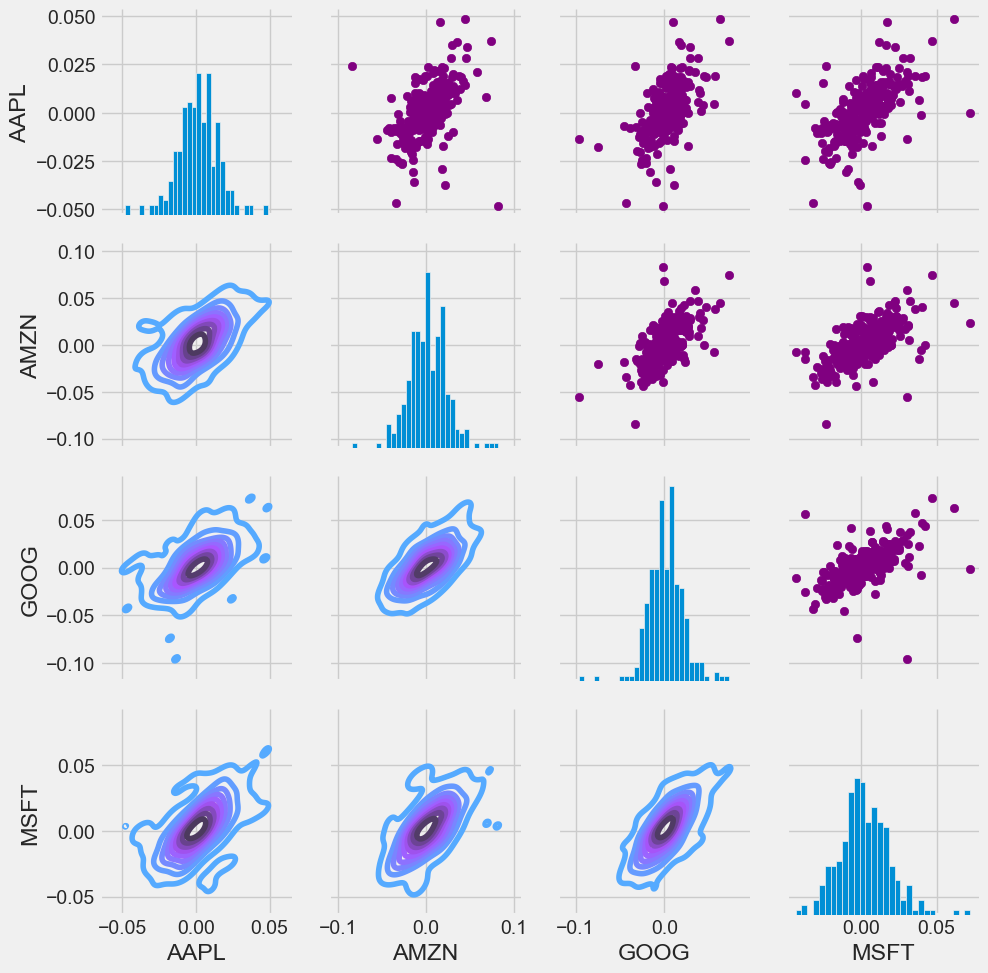

In [14]:
# Şekilimize return_fig adını vererek ayarlayın, DataFrame'de PairPLot'u çağırın
return_fig = sns.PairGrid(tech_rets.dropna())

# Map_upper'ı kullanarak üstteki üçgenin nasıl görüneceğini belirleyebiliriz.
return_fig.map_upper(plt.scatter, color='purple')

# Çizim tipini (kde) de içerecek şekilde şekildeki alt üçgeni de tanımlayabiliriz.
# veya renk haritası (MaviMor)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Son olarak köşegeni günlük getirinin bir dizi histogram grafiği olarak tanımlayacağız
return_fig.map_diag(plt.hist, bins=30)

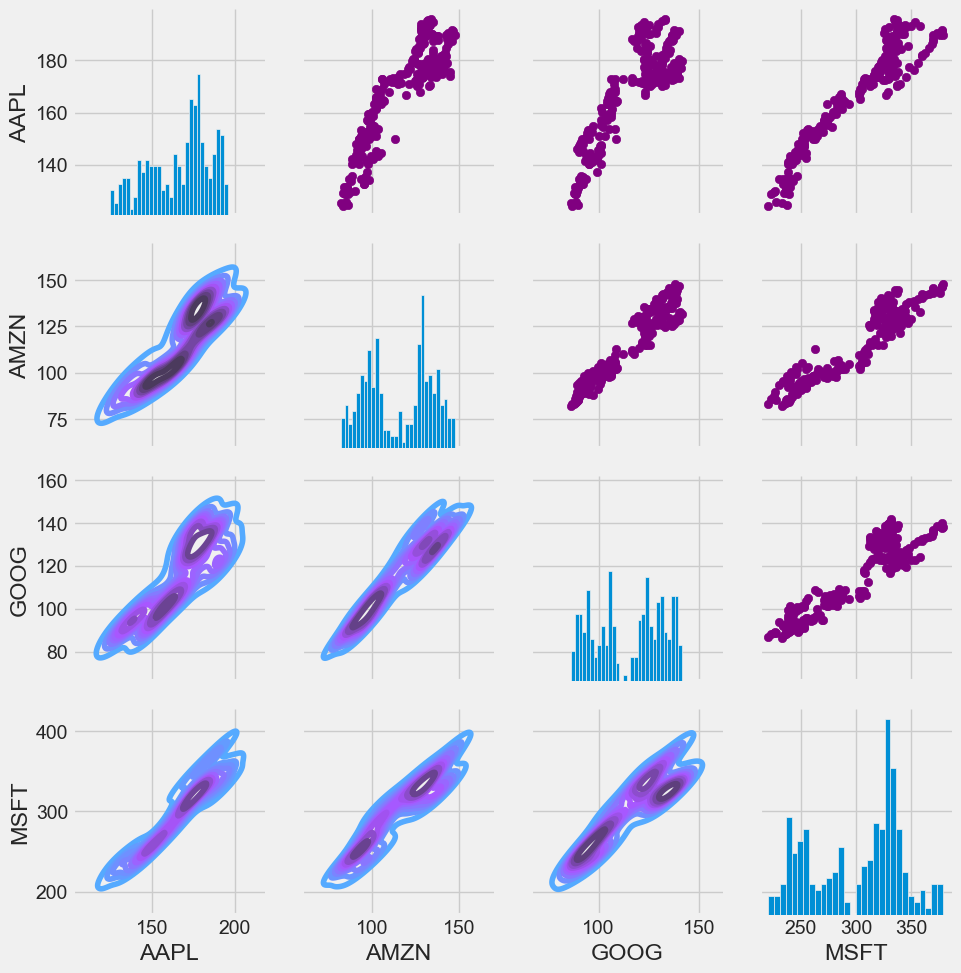

In [15]:
# Şekilimize return_fig adını vererek ayarlayın, DataFrame'de PairPLot'u çağırın
returns_fig = sns.PairGrid(closing_df)

# Map_upper'ı kullanarak üstteki üçgenin nasıl görüneceğini belirleyebiliriz.
returns_fig.map_upper(plt.scatter,color='purple')

# Çizim tipini (kde) veya renk haritasını (BluePurple) içerecek şekilde şekildeki alt üçgeni de tanımlayabiliriz.
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Son olarak köşegeni günlük getirinin bir dizi histogram grafiği olarak tanımlayacağız
returns_fig.map_diag(plt.hist,bins=30)

Son olarak, hisse senetlerinin günlük getiri değerleri arasındaki korelasyonun gerçek sayısal değerlerini elde etmek için bir korelasyon grafiği de yapabiliriz. Kapanış fiyatlarını karşılaştırdığımızda Microsoft ile Apple arasında ilginç bir ilişki görüyoruz.

Text(0.5, 1.0, 'Hisse senedi kapanış fiyatı korelasyonu')

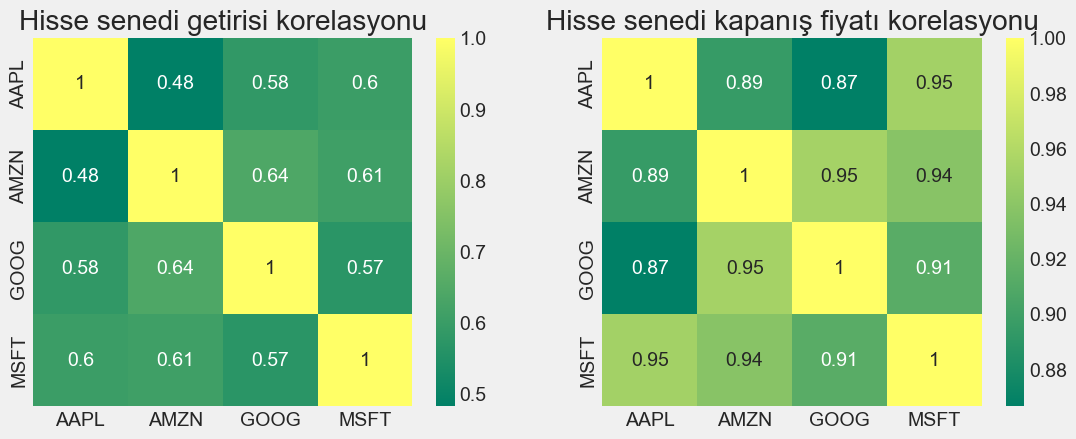

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Hisse senedi getirisi korelasyonu')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Hisse senedi kapanış fiyatı korelasyonu')

Tıpkı 'PairPlot'ta şüphelendiğimiz gibi, burada sayısal ve görsel olarak Microsoft ve Amazon'un günlük hisse senedi getirileri arasında en güçlü korelasyona sahip olduğunu görüyoruz. Tüm teknoloji şirketlerinin pozitif korelasyon içinde olduğunu görmek de ilginç.

# 5. Belirli bir hisse senedine yatırım yaparak ne kadar değeri riske atıyoruz?

Riski ölçmenin birçok yolu vardır; günlük yüzde getiriler hakkında topladığımız bilgileri kullanmanın en temel yollarından biri, beklenen getiriyi günlük getirilerin standart sapması ile karşılaştırmaktır.

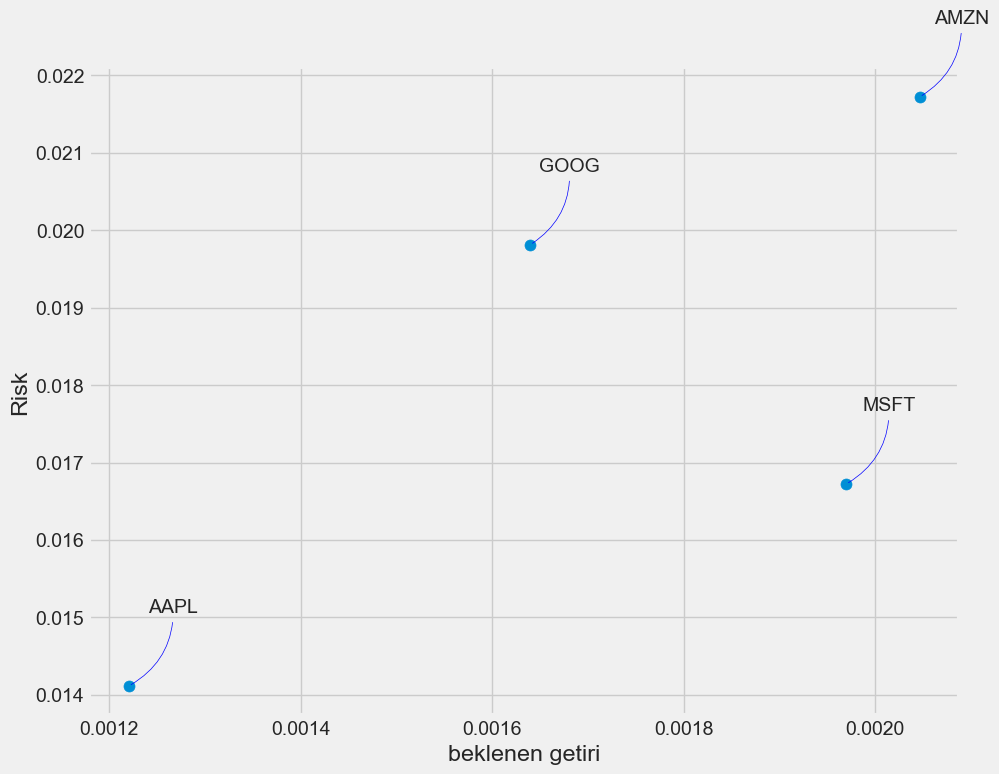

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('beklenen getiri')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Pegasusun kapanış fiyatını tahmin etmek:

In [18]:
# Hisse senedi fiyatını alın
df = pdr.get_data_yahoo('PGSUS.IS', start='2012-01-01', end=datetime.now())

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-26,18.750000,19.150000,18.500000,18.750000,18.750000,10985042
2013-07-23,28.700001,28.900000,27.500000,28.700001,28.700001,3082248
2013-07-24,27.600000,29.200001,27.600000,27.600000,27.600000,1986575
2013-07-25,27.600000,27.900000,26.900000,27.600000,27.600000,1714963
2013-07-26,27.400000,27.900000,27.299999,27.400000,27.400000,500852
...,...,...,...,...,...,...
2023-11-22,755.000000,761.000000,737.000000,738.000000,738.000000,1826065
2023-11-23,738.000000,747.500000,725.000000,725.000000,725.000000,2146217
2023-11-24,724.500000,735.500000,721.500000,726.500000,726.500000,1695789


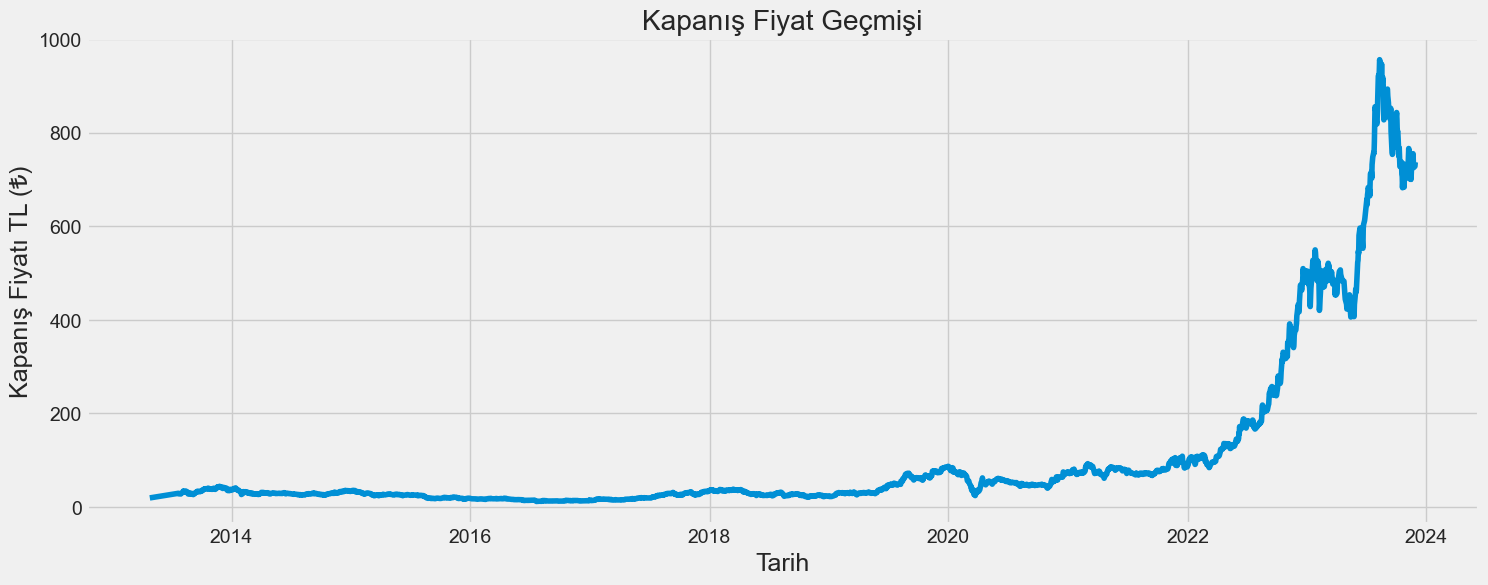

In [19]:
plt.figure(figsize=(16,6))
plt.title('Kapanış Fiyat Geçmişi')
plt.plot(df['Close'])
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('Kapanış Fiyatı TL (₺)', fontsize=18)
plt.show()

In [20]:
# Yalnızca Kapanış sütununu içeren yeni bir veri çerçevesi oluşturun
data = df.filter(['Close'])

# Veri çerçevesini numpy dizisine dönüştürün
dataset = data.values

# Modeli eğitmek için satır sayısını alın
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2527

In [21]:
# Verileri ölçeklendirin
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00809609],
       [0.01862631],
       [0.01746217],
       ...,
       [0.75711716],
       [0.75870462],
       [0.76770029]])

In [22]:
# Eğitim veri setini oluşturun
# Ölçeklendirilmiş eğitim veri kümesini oluşturun
train_data = scaled_data[0:int(training_data_len), :]

# Verileri x_train ve y_train veri kümelerine bölün
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

# x_train ve y_train'i numpy dizilerine dönüştürün
x_train, y_train = np.array(x_train), np.array(y_train)

# Verileri yeniden şekillendirin
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("X Eğitim Şekli: ", x_train.shape)

[array([0.00809609, 0.01862631, 0.01746217, 0.01746217, 0.0172505 ,
       0.01693301, 0.01777966, 0.01788549, 0.01873214, 0.01979045,
       0.02180125, 0.02338872, 0.02243624, 0.02338872, 0.02338872,
       0.02211874, 0.02127209, 0.02285956, 0.02158959, 0.02307123,
       0.02137792, 0.01947296, 0.01703884, 0.01777966, 0.01947296,
       0.01947296, 0.01693301, 0.01682718, 0.01777966, 0.01777966,
       0.01820298, 0.01650968, 0.01619219, 0.0158747 , 0.0155572 ,
       0.0172505 , 0.01852048, 0.01883797, 0.01989628, 0.02000212,
       0.02201291, 0.02127209, 0.02180125, 0.02338872, 0.02328289,
       0.02307123, 0.02222457, 0.02211874, 0.02211874, 0.02222457,
       0.02360038, 0.02412954, 0.02370621, 0.02423537, 0.02624616,
       0.02656366, 0.02666949, 0.02825696, 0.0277278 , 0.02857445])]
[0.02899777715058953]

[array([0.00809609, 0.01862631, 0.01746217, 0.01746217, 0.0172505 ,
       0.01693301, 0.01777966, 0.01788549, 0.01873214, 0.01979045,
       0.02180125, 0.02338872, 0.02

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# LSTM modelini oluşturun
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Modeli derle
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğit
model.fit(x_train, y_train, batch_size=1, epochs=1)

2467/2467 [==============================] - 31s 12ms/step - loss: 5.1275e-04


In [24]:
# Test veri kümesini oluşturun
# 1543'ten 2002'ye kadar ölçeklendirilmiş değerleri içeren yeni bir dizi oluşturun
test_data = scaled_data[training_data_len - 60: , :]

# x_test ve y_test veri kümelerini oluşturun
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Veriyi numpy dizisine dönüştürün
x_test = np.array(x_test)

# Verileri yeniden şekillendirin
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Modellerin tahmini fiyat değerlerini alın
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Kök ortalama kare hatasını (RMSE) alın
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 11ms/step


34.732500723194825

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_16188\1970368405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


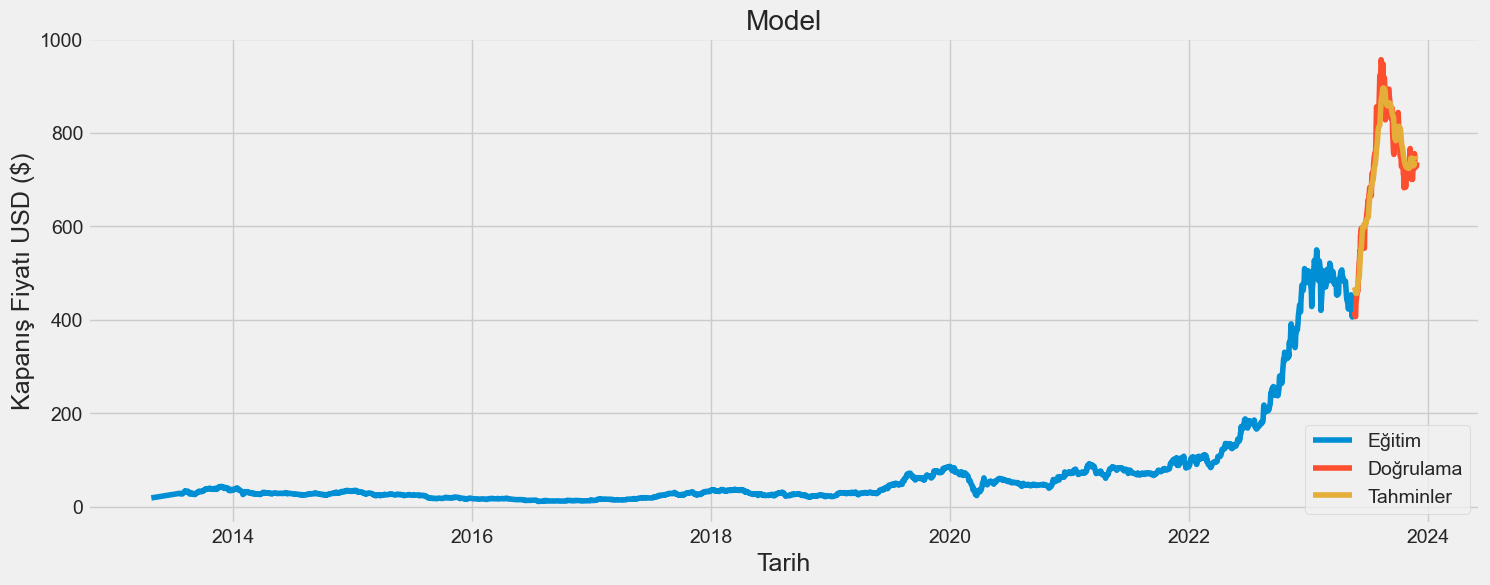

In [25]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('Kapanış Fiyatı USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Eğitim', 'Doğrulama', 'Tahminler'], loc='lower right')
plt.show()

In [26]:
# Geçerli ve tahmini fiyatları göster
valid

,Close,Predictions
Date,,
2023-05-22,416.899994,469.373413
2023-05-23,413.000000,467.016907
2023-05-24,406.500000,463.834076
2023-05-25,406.500000,459.833740
2023-05-26,432.500000,456.032684
...,...,...
2023-11-22,738.000000,739.770691
2023-11-23,725.000000,743.369324
2023-11-24,726.500000,744.014404


# Özet
Bu not defterinde hisse senedi verilerini keşfettiniz ve incelediniz.

Özellikle şunları öğrendiniz:

- Yfinance kullanarak YAHOO Finance web sitesinden borsa verileri nasıl yüklenir?
- Pandalar, Matplotlib ve Seaborn kullanılarak zaman serisi verileri nasıl keşfedilir ve görselleştirilir.
- Hisse senetleri arasındaki korelasyon nasıl ölçülür?
- Belirli bir hisse senedine yatırım yapma riskinin nasıl ölçüleceği.

Sormak istediğiniz bir şey var mı?
Aşağıdaki yorumlarda sorularınızı sorun, cevaplamak için elimden geleni yapacağım.

Referanslar:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Kursu: Veri Analizi ve Görselleştirme için Python'u Öğrenmek](https://www.udemy.com/course/learning-python-for-data-analiz-and-visualization/)